# **Algoritmos de Busca Cega**

             1 - Busca em largura (busca em extensão) (BFS – Breadth-first search) 
             2 - Busca em profundidade (DFS – Depth-first search) 
             3 - Busca de custo uniforme (UCS - Uniform-Cost Search)

# **Algoritmos de Busca Informada (Heuristica)**

             1 - Busca A* (A estrela)



Atividade: Considerando a árvore abaixo, construa 4 algoritmos de busca utilizando as técnicas acima (Busca em Largura, Profundidade, custo uniforme e A*).  \ 

 Obs1: O peso das arestas são utilizados nos algoritmos UCS e A*  e a Heurística será utilizada na Busca A* 

 Obs2: O nó **N** representa o estado final e o nó **A** representa o estado inicial da busca.

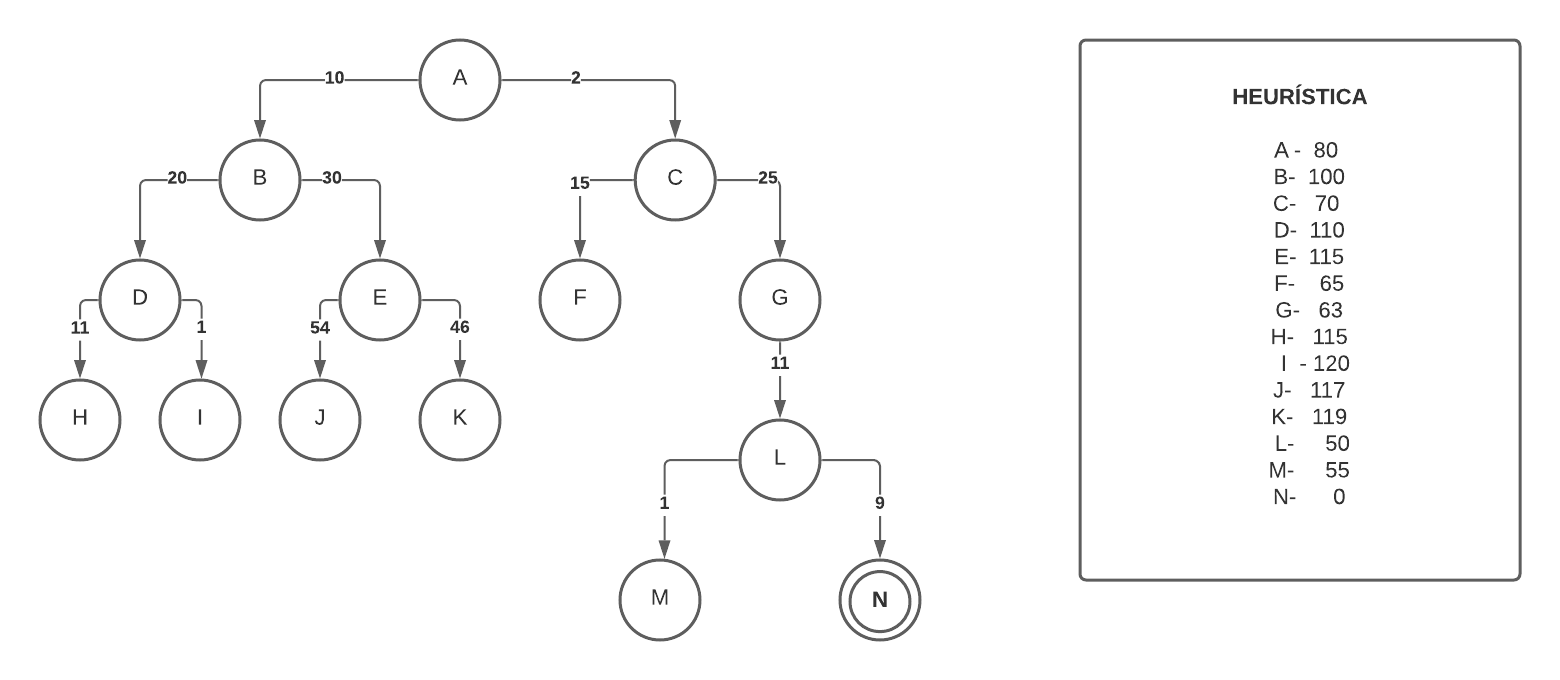

In [1]:
grafo = {
  'A' : ['B','C'],
  'B' : ['D','E'],
  'C' : ['F','G'],
  'D' : ['H','I'],
  'E' : ['J','K'],
  'F' : [],
  'G' : ['L'],
  'H' : [],  
  'I' : [], 
  'J' : [], 
  'K' : [], 
  'L' : ['M','N'],  
  'M' : [], 
  'N' : []
}

In [2]:
#array de visitados
visitado = []

#array da fila
fila = []

# funcao da Breadth First Search (busca em largura)
def bfs(visitado, grafo, no):
    visitado.append(no)
    fila.append(no)
    
    while fila:
        s = fila.pop(0)
        print(s, end=' ')
        
        for vizinho in grafo[s]:
            if vizinho not in visitado:
                visitado.append(vizinho)
                fila.append(vizinho)
 
 #pra parar quando encontra o 'N':
 #      if vizinho == 'N':
 #           print('encontrado!')
 #           break
                
bfs(visitado, grafo, 'A')

A B C D E F G H I J K L M N 

In [3]:
#conjunto para rastrear nos visitados
visitado = set()

#função da Depth-first search - em profundidade
def dfs(visitado, grafo, no):
    if no not in visitado:
        print(no, end=' ')
        visitado.add(no)
        for vizinho in grafo[no]:
            dfs(visitado, grafo, vizinho)
            
dfs(visitado, grafo, 'A')

A B D H I E J K C F G L M N 

In [2]:
dic = {
  'A' : {'B':10,'C':2},
  'B' : {'D':20,'E':30},
  'C' : {'F':15,'G':25},
  'D' : {'H':11,'I':1},
  'E' : {'J':54,'K':46},
  'F' : {},
  'G' : {'L':11},
  'H' : {},  
  'I' : {}, 
  'J' : {}, 
  'K' : {}, 
  'L' : {'M':1,'N':9},  
  'M' : {}, 
  'N' : {}
} 

In [5]:
import queue as Q

#função da Uniform-Cost Search
def ucs(grafo, inicio, objetivo):
    if inicio not in grafo:
        raise TypeError(str(inicio) + ' Não encontrado no grafo!')
        return
    if objetivo not in grafo:
        raise TypeError(str(objetivo) + ' Não encontrado no grafo!')
        return
    
    fila = Q.PriorityQueue()
    fila.put((0, [inicio]))
    
    while not fila.empty():
        no = fila.get()
        atual = no[1][len(no[1]) - 1]
        
        if objetivo in no[1]:
            print("Caminho encontrado: " + str(no[1]) + ", Custo = " + str(no[0]))
            break
        
        custo = no[0]
        for vizinho in grafo[atual]:
            temp = no[1][:]
            temp.append(vizinho)
            fila.put((custo + grafo[atual][vizinho], temp))
            
ucs(dic, 'A', 'N')

Caminho encontrado: ['A', 'C', 'G', 'L', 'N'], Custo = 47


In [4]:
arvore = {
  'A' : [['B',10],['C',2]],
  'B' : [['D',20],['E',30]],
  'C' : [['F',15],['G',25]],
  'D' : [['H',11],['I',1]],
  'E' : [['J',54],['K',46]],
  'F' : [],
  'G' : [['L',11]],
  'H' : [],  
  'I' : [], 
  'J' : [], 
  'K' : [], 
  'L' : [['M',1],['N',9]],  
  'M' : [], 
  'N' : []
}

heuristica  = {'A': 80, 'B': 100, 'C': 70, 'D': 110, 'E': 115, 'F': 65, 'G': 63, 'H': 115, 'I': 120, 'J': 117, 'K': 119, 'L': 50, 'M': 55, 'N':0, 'O':0, 'P':0, 'Q':0, 'R':0}

In [8]:
# custo total para nos visitados
custo = {'A': 0} 

#função A*
def AStar():
    global arvore, heuristica
    
    #nos fechados    
    fechado = []             
    #nos abertos
    aberto = [['A', 80]]     
    
    # laço para encontrar nos visitados
    while True:
        # fn = f(n) = g(n) + h(n)
        fn = [i[1] for i in aberto]     
        indiceEscolhido = fn.index(min(fn))
        
        #no atual
        no = aberto[indiceEscolhido][0]  
        fechado.append(aberto[indiceEscolhido])
        
        del aberto[indiceEscolhido]
        
        # quebra o loop se encontar o N
        if fechado[-1][0] == 'N':       
            break
        for item in arvore[no]:
            if item[0] in [itemFechado[0] for itemFechado in fechado]:
                continue
                
            #adicionar nós ao dicionário de custos    
            custo.update({item[0]: custo[no] + item[1]})      
            #calcula f(n) do no atual
            fnNo = custo[no] + heuristica[item[0]] + item[1]     
            temp = [item[0], fnNo]
            #armazenar f(n) do nó atual na matriz aberta
            aberto.append(temp)                                   

    # encontra sequencia otima
    #nó de rastreamento ideal correto, inicializar como nó N
    tracoNo = 'N'                     
    sequenciaOtima = ['N']                
    for i in range(len(fechado)-2, -1, -1):
        checarNo = fechado[i][0]
        if tracoNo in [filho[0] for filho in arvore[checarNo]]:
            custoFilho = [temp[1] for temp in arvore[checarNo]]
            noFilho = [temp[0] for temp in arvore[checarNo]]

            #verifique se h (s) + g (s) = f (s). Em caso afirmativo, anexe o nó atual à sequência ideal
            #muda o nó de rastreamento ideal correto para o nó atual
            if custo[checarNo] + custoFilho[noFilho.index(tracoNo)] == custo[tracoNo]:
                sequenciaOtima.append(checarNo)
                tracoNo = checarNo
    #inverte a sequencia otima            
    sequenciaOtima.reverse()            

    return fechado, sequenciaOtima


if __name__ == '__main__':
    nosVisitados, nosOtimos = AStar()
    print('Nos visitados: ' + str(nosVisitados))
    print('Sequencia otima: ' + str(nosOtimos))

Nos visitados: [['A', 80], ['C', 72], ['F', 82], ['G', 90], ['L', 88], ['N', 47]]
Sequencia otima: ['A', 'C', 'G', 'L', 'N']
